In [1]:
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
symbols = ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA", "NVDA", "JPM", "V", "JNJ", "BAC"]

end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=365)

dataframes = []

for ticker in symbols:
    df = yf.download(ticker, start=start_date, end=end_date)
    df["Symbol"] = ticker
    dataframes.append(df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
for i, df in enumerate(dataframes):
    max_idx = df['Volume'].idxmax()
    print(f'Day with most {symbols[i]} trades: {str(max_idx)[0:10]}')

    # Calculate the percent change in stock price per day
    daily_pct_change = df['Close'].pct_change()
    print(f'Percent change in {symbols[i]} stock price per day:\n{daily_pct_change}\n')

Day with most AAPL trades: 2022-05-12
Percent change in AAPL stock price per day:
Date
2022-02-23         NaN
2022-02-24    0.016680
2022-02-25    0.012965
2022-02-28    0.001638
2022-03-01   -0.011628
                ...   
2023-02-15    0.013903
2023-02-16   -0.010429
2023-02-17   -0.007547
2023-02-21   -0.026680
2023-02-22    0.005662
Name: Close, Length: 251, dtype: float64

Day with most MSFT trades: 2022-12-16
Percent change in MSFT stock price per day:
Date
2022-02-23         NaN
2022-02-24    0.051094
2022-02-25    0.009233
2022-02-28    0.004978
2022-03-01   -0.012852
                ...   
2023-02-15   -0.010471
2023-02-16   -0.026623
2023-02-17   -0.015602
2023-02-21   -0.020887
2023-02-22    0.000752
Name: Close, Length: 251, dtype: float64

Day with most GOOG trades: 2023-02-09
Percent change in GOOG stock price per day:
Date
2022-02-23         NaN
2022-02-24    0.039883
2022-02-25    0.013914
2022-02-28    0.002762
2022-03-01   -0.005360
                ...   
2023-02-15 

Q2 What is a percent change in a stock price per day across the entire time period? (With Plots)


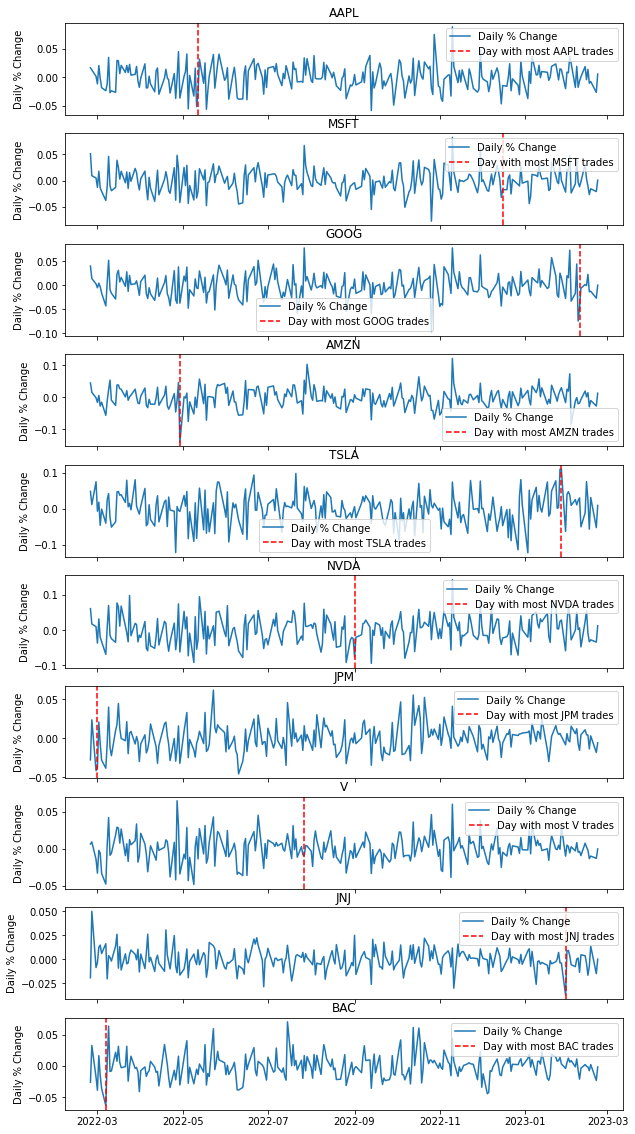

In [8]:
fig, axs = plt.subplots(nrows=len(dataframes), sharex=True, figsize=(10, 20))
for i, df in enumerate(dataframes):
    max_idx = df['Volume'].idxmax()
    axs[i].set_title(f'{symbols[i]}')
    axs[i].plot(df.index, df['Close'].pct_change())
    axs[i].axvline(x=max_idx, color='r', linestyle='--')
    axs[i].set_ylabel('Daily % Change')
    axs[i].legend(['Daily % Change', f'Day with most {symbols[i]} trades'])

plt.show()

Q3: What are the days with anomalous trading activity (in terms of volume )?

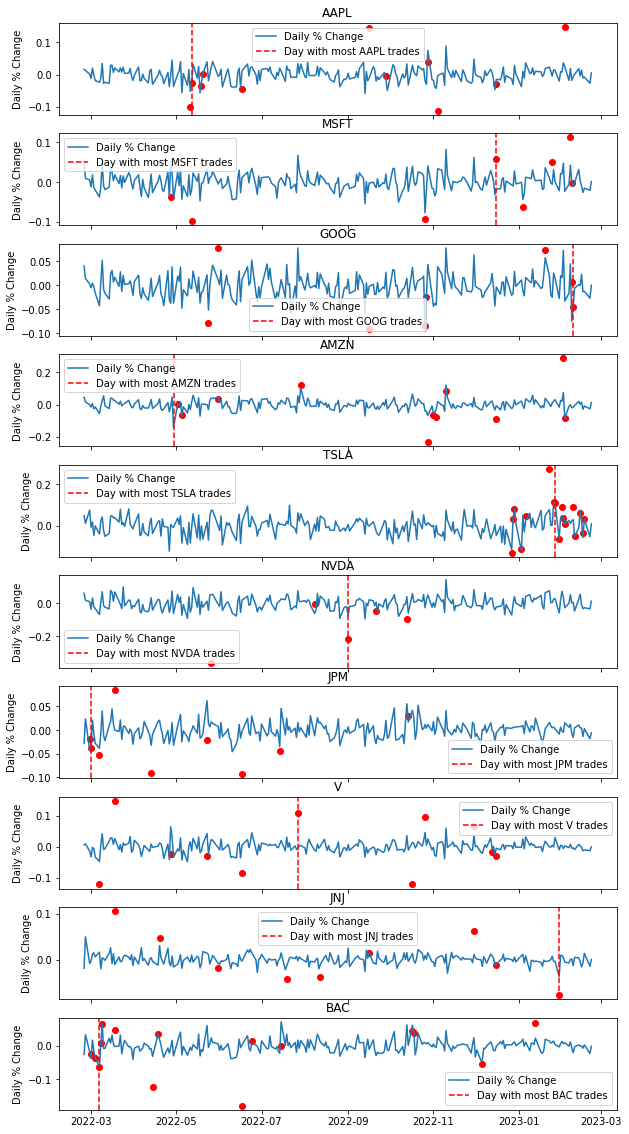

In [9]:
fig, axs = plt.subplots(nrows=len(dataframes), sharex=True, figsize=(10, 20))

for i, df in enumerate(dataframes):
    max_idx = df['Volume'].idxmax()
    axs[i].set_title(f'{symbols[i]}')
    axs[i].plot(df.index, df['Close'].pct_change())
    axs[i].axvline(x=max_idx, color='r', linestyle='--')
    axs[i].set_ylabel('Daily % Change')
    axs[i].legend(['Daily % Change', f'Day with most {symbols[i]} trades'])
    anomalous_days = df[df['Volume'] > df['Volume'].mean() + 2 * df['Volume'].std()].index
    axs[i].scatter(anomalous_days, df.loc[anomalous_days, 'Close'].pct_change(), color='r')

plt.show()

Q4 For each sector of stock, what was the month that saw the highest trading activity?

Q5 Plot 20 day, 50 day and 100 day EMA (exponential moving averages) for each stock. At what dates, if any, does the stock price drop below 100 day EMA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/tmp/ipykernel_3177/924151667.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sector_df_monthly = sector_df.resample('M').sum()
/tmp/ipykernel_3177/924151667.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sector_df_monthly = sector_df.resample('M').sum()
/tmp/ipykernel_3177/924151667.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sector_df_monthly = sector_df.resample('M').sum()
/tmp/ipykernel_3177/92415

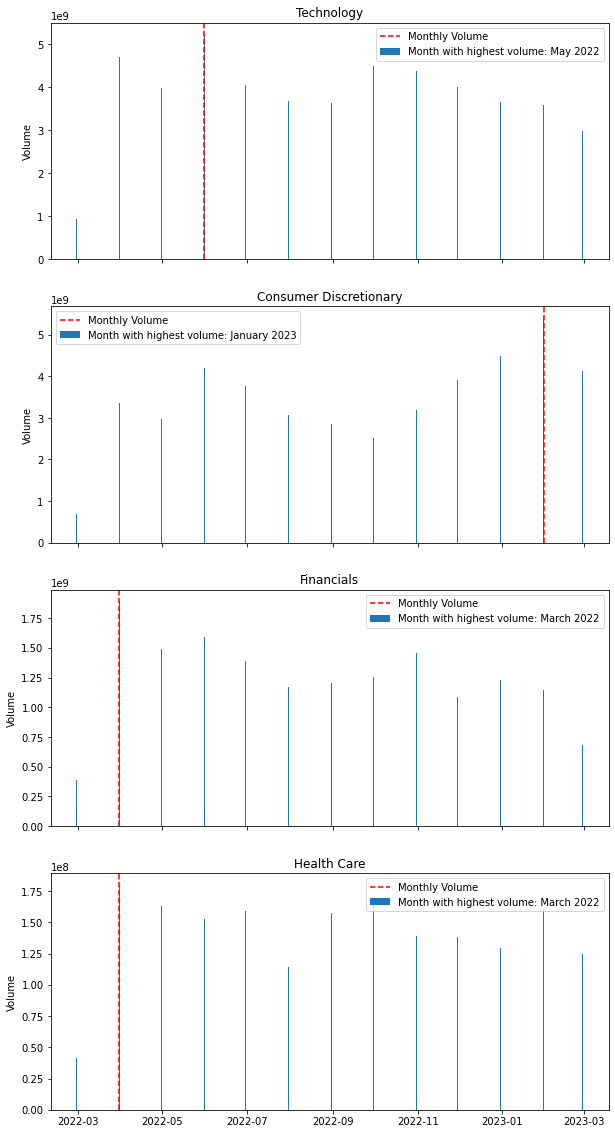

In [12]:
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import pandas as pd

symbols = {"Technology": ["AAPL", "MSFT", "GOOG", "NVDA"],
           "Consumer Discretionary": ["AMZN", "TSLA"],
           "Financials": ["JPM", "V", "BAC"],
           "Health Care": ["JNJ"]}
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=365)
dataframes = []

for sector, stocks in symbols.items():
    for ticker in stocks:
        df = yf.download(ticker, start=start_date, end=end_date)
        df["Symbol"] = ticker
        df["Sector"] = sector
        dataframes.append(df)

df_all = pd.concat(dataframes)

fig, axs = plt.subplots(nrows=len(symbols), sharex=True, figsize=(10, 20))

for i, (sector, stocks) in enumerate(symbols.items()):
    sector_df = df_all[df_all["Sector"] == sector]
    sector_df_monthly = sector_df.resample('M').sum()
    max_month = sector_df_monthly["Volume"].idxmax().strftime('%B %Y')
    axs[i].set_title(sector)
    axs[i].bar(sector_df_monthly.index, sector_df_monthly["Volume"])
    axs[i].axvline(x=sector_df_monthly["Volume"].idxmax(), color='r', linestyle='--')
    axs[i].set_ylabel('Volume')
    axs[i].legend(['Monthly Volume', f'Month with highest volume: {max_month}'])

plt.show()

Q6 Which stocks are most likely to rise and fall together?

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


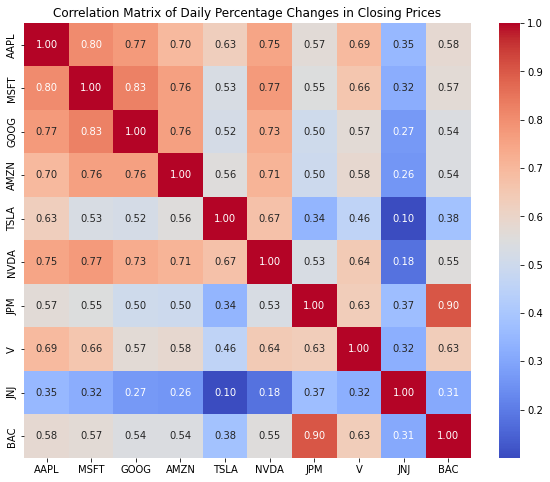

In [3]:
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import pandas as pd
import seaborn as sns

symbols = ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA", "NVDA", "JPM", "V", "JNJ", "BAC"]

end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=365)

dataframes = []

for ticker in symbols:
    df = yf.download(ticker, start=start_date, end=end_date)
    df["Symbol"] = ticker
    dataframes.append(df)

df_all = pd.concat(dataframes)

# Compute daily percentage changes for each stock
pct_changes = {}
for symbol in symbols:
    df = df_all[df_all["Symbol"] == symbol]
    pct_changes[symbol] = df["Close"].pct_change()

# Compute correlation coefficients for all pairs of stocks
corr_matrix = pd.DataFrame(index=symbols, columns=symbols)
for symbol1 in symbols:
    for symbol2 in symbols:
        corr = pct_changes[symbol1].corr(pct_changes[symbol2])
        corr_matrix.loc[symbol1, symbol2] = corr

# Visualize correlation coefficients as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.astype(float), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix of Daily Percentage Changes in Closing Prices")
plt.show()